In [1]:
from ThreeDimensionalAStar import *
from X import X
from Path import PriorityQueue

from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

In [2]:
class FreeNode:
    def __init__(self, fK: FlooredKnot, pointsToSetFree: list[ThreeDimensionalPoint], requirements: list[ThreeDimensionalPoint] = [], notRequirements: list[ThreeDimensionalPoint] = [], previousTransforms: list[ThreeDimensionalTransform] = []):
        self.fK = fK
        self.pointsToSetFree = []
        self.previousTransforms = previousTransforms
        self.requirements = requirements
        self.notRequirements = []
        for point in pointsToSetFree+notRequirements:
            if self.fK.isOne(point):
                self.pointsToSetFree.append(point)
            else:
                self.notRequirements.append(point)

    @property
    def priority(self):
        return len(self.pointsToSetFree) + len(self.previousTransforms)

def transformsForSetFree(fK: FlooredKnot, points: list[ThreeDimensionalPoint], requirements: list[ThreeDimensionalPoint] = [],debug = False):
    if debug: print("transformsForSetFree",points, "debug:",debug)
    if fK.isZero(points):
        return []
    firstNode = FreeNode(deepcopy(fK),points,requirements)
    queue = PriorityQueue[FreeNode]()
    queue.put(firstNode.priority,firstNode)
    openList = []
    d = 0
    while not queue.isEmpty and d<1000:
        d+=1
        node = queue.get()
        if debug>0: print("          ",node.priority,node.pointsToSetFree ,node.previousTransforms)
        openList.append((node.fK, node.pointsToSetFree))
        if len(node.pointsToSetFree) == 0:
            return node.previousTransforms
        meanPoint = meanOfPoints(node.pointsToSetFree)
        allTransforms = ThreeDimensionalTransform.allPosibilitesNearbyOf(meanPoint,node.fK.fM.pointsOrdered())
        setTransforms: set[ThreeDimensionalTransform] = set()
        if debug>1: print("          Filtramos:")
        for transform in allTransforms:
            if debug>1: print("               ",transform)
            
            if transform.type == ThreeDimensionalTransformType.allInLine:
                axis = fK.typeThreeInLine(transform.point)
                if type(axis) == type(None):
                    if debug>1: print("               No se puede hacer porque es de allInline, pero no esta en una linea")
                    continue
                allPoints = fK.allPointsInLine(transform.point, axis)
                if len(allPoints) > 2:
                    transform.point = allPoints[1]
                else:
                    if debug>1: print("               No se puede hacer porque es de allInline, pero tiene dos de en linea")
                    continue
            
            setTransforms.add(transform)
        if debug>1: print("          Ya filtrados, los estudiamos hay: {}".format(len(setTransforms)))    
        for transform in setTransforms:
            if debug>1: print("               ",transform)
            auxPoints = node.fK.auxiliarPointsForTransform(transform)
            if type(auxPoints) == type(None):
                if debug>1: print("               No se puede hacer porque auxPoints es None")
                continue
            freePoints, toCompletePoints, pointsToDelete = auxPoints
            if any([p in node.requirements for p in pointsToDelete]):
                if debug>1: print("               No se puede hacer porque hay puntos a eliminar que son requerimientos")
                continue
            #if any([p in node.notRequirements for p in toCompletePoints]):
            #    if debug>1: print("               No se puede hacer porque hay puntos a completar que son no requerimientos")
            #    continue
            if node.fK.isZero(freePoints):
                if debug>1: print("               Se puede hacer, lo hacemos y generamos nuevo nodo")
                c = deepcopy(node.fK)
                c.applyTransform(transform)
                newPreviousTransforms = deepcopy(node.previousTransforms) + [transform]
                newNode = FreeNode(c,deepcopy(node.pointsToSetFree),deepcopy(node.requirements),deepcopy(node.notRequirements),newPreviousTransforms)
                if not (newNode.fK,newNode.pointsToSetFree) in openList:
                    queue.put(newNode.priority,newNode)
            else:
                if debug>1: print("               No se puede hacer porque hay puntos ocupados, pero los añadimos a freePoints y creamos nuevo nodo.")
                if debug>1: print("               Los puntos ocupados son: {}".format([p for p in freePoints if node.fK.isOne(p)]))
                newPointsToSetFree = deepcopy(node.pointsToSetFree)+freePoints
                newNode = FreeNode(deepcopy(node.fK),newPointsToSetFree,deepcopy(node.requirements),deepcopy(node.notRequirements),deepcopy(node.previousTransforms))
                if not (newNode.fK,newNode.pointsToSetFree) in openList:
                    queue.put(newNode.priority,newNode)
    return None

    

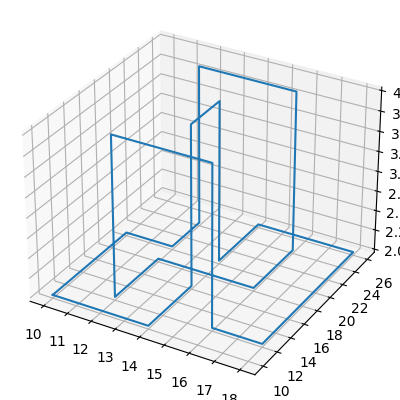

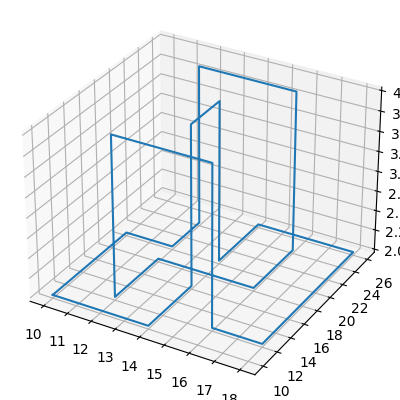

In [3]:

k1 = CustomKnot([X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)])
k2 = CustomKnot([X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)])
fK1 = FlooredKnot(k1)
fK2 = FlooredKnot(k1)

fK1.plot()

# t = ThreeDimensionalTransformType.inLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         transform = ThreeDimensionalTransform\(point,t,variety=True,direction=direction)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             c.plot([point,point.move(direction)])


# t = ThreeDimensionalTransformType.inCorner
# for point in fK1.fM.pointsOrdered():
#     transform = ThreeDimensionalTransform\(point,t)
#     c = deepcopy(fK1)
#     if c.applyTransform(transform):
#         c.plot([point,point.move(Axis.Z)])


# transform = ThreeDimensionalTransform\(ThreeDimensionalPoint(11,10,2),ThreeDimensionalTransformType.inLine,True,AxisDirection.YD)
# fK1.applyTransform(transform)
# fK1.plot()
# t = ThreeDimensionalTransformType.inLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     transform = ThreeDimensionalTransform\(point,t,variety=False)
#     c = deepcopy(fK1)
#     if c.applyTransform(transform):
#         c.plot([point,point.move(AxisDirection.ZU)])


# t = ThreeDimensionalTransformType.allInLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         transform = ThreeDimensionalTransform\(point,t,variety=True,direction=direction)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             c.plot([point,point.move(direction)])

# i=0
# t = ThreeDimensionalTransformType.doubleAllInLine
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         transform = ThreeDimensionalTransform(point,t,variety=True,direction=direction)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             if i>5:
#                 raise Exception(")")
#             print(transform)
#             c.plot([point,point.move(direction)])
#             plt.pause(0.005)

# t = ThreeDimensionalTransformType.inCornerForSide
# for point in fK1.fM.pointsOrdered():
#     direction = AxisDirection.ZD
#     for direction in list(AxisDirection):
#         for v in [True,False]:
#             transform = ThreeDimensionalTransform(point,t,variety=v,direction=direction)
#             c = deepcopy(fK1)
#             if c.applyTransform(transform):
#                 c.plot([point,point.move(direction)])


# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,12)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,13)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,14)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,15)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,16)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,17)),ThreeDimensionalTransformType.allInLineDoubleDirection,variety=False)
# print(fK1.applyTransform(transform))

# t = ThreeDimensionalTransformType.allInLineDoubleDirection
# for point in fK1.fM.pointsOrdered():
#     for variety in [False, True]:
#         transform = ThreeDimensionalTransform(point,t,variety=variety)
#         c = deepcopy(fK1)
#         if c.applyTransform(transform):
#             print(variety)
#             c.plot([point,point.move(AxisDirection.ZU)])

# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,12,12)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,variety=False)
# print(fK1.applyTransform(transform))

# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,16,12)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,18,12)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False)
# print(fK1.applyTransform(transform))
# transform = ThreeDimensionalTransform(ThreeDimensionalPoint((3,18,26)),ThreeDimensionalTransformType.allInLineDoubleDirectionLoop,False)
# print(fK1.applyTransform(transform))


# transforms = transformsForSetFree(fK1,[ThreeDimensionalPoint(12,18,2)],[ThreeDimensionalPoint(12,17,2)])
# for transform in transforms:
#     fK1.applyTransform(transform)

# transform = ThreeDimensionalTransform(ThreeDimensionalPoint(12,24,2),ThreeDimensionalTransformType.switchSide,False,AxisDirection.XD)
# print(fK1.applyTransform(transform))

# print(fK1.reducesLength())

fK1.plot()

# print(fK1.undoAllInLine(ThreeDimensionalPoint((2,9,15))))
# fK1.plot()

In [8]:

class ThreeDimensionalNode:
    def __init__(self, fK: FlooredKnot, transforms: list[ThreeDimensionalTransform] = []):
       
        self.fK = deepcopy(fK)
        self.transforms = deepcopy(transforms)
    
    def successors(self, points = None, debug = False):
        if points == None:
            points = self.fK.fM.pointsOrdered()
        aux: list[ThreeDimensionalNode] = []
        for point in points:
            for transform in ThreeDimensionalTransform.allPosibilitesIn(point):
                successor = deepcopy(self)
                if successor.applyTransform(transform, debug=debug):
                    aux.append(successor)
        return aux
    
    def nearbySuccessors(self, point: ThreeDimensionalPoint = None, debug = False):
        if type(point) == type(None):
            lastPoint = point
        else:
            if len(self.transforms) == 0:
                return self.successors()
            lastPoint = self.transforms[-1].point
        points = nearbyPointsOf(lastPoint, self.fK.fM.pointsOrdered())
        return self.successors(points, debug=debug)

    def applyTransform(self, transform: ThreeDimensionalTransform, debug = False):
        if debug: print(transform)
        if self.fK.applyTransform(transform,debug=debug):
            self.transforms.append(transform)
            return True
        return False

    def checkTargets(self,targets:list[ThreeDimensionalTarget], debug = False):
        if len(targets) == 1:
            return self.fK.isOne(targets[0].point)
        if len(targets) == 0:
            return True
        allPoints = self.fK.fM.pointsOrdered()
        indexOfFirstTarget = allPoints.index(targets[0].point)
        if debug: 
            print("allPoints", allPoints)
            print("indexOfFirstTarget",indexOfFirstTarget)
        for i in range(len(targets)):
            point = targets[i].point
            orderedPoint = allPoints[(indexOfFirstTarget+i)%len(allPoints)]
            if debug: 
                print("Chequeando", point)
                print("orderedPoint", orderedPoint)
            if point != orderedPoint:
                return False
        return True

    def printTargetCompletes(self,targets:list[ThreeDimensionalTarget], debug = False):
        for i in range(len(targets)+1):
            if debug: print("Chequeando {}".format([t.point for t in targets[:i]]))
            if not self.checkTargets(targets[:i], debug=debug):
                print("Targets Completes:",i-1)
                print("Transforms:",len(self.transforms))
                return         
    
    def firstPriority(self,point:ThreeDimensionalPoint):
        return distance(point,self.fK.fM.pointsOrdered()) + len(self.transforms) 

    def middlePriority(self,requirementsPoints:list[ThreeDimensionalPoint], point: ThreeDimensionalPoint):
        points = [point for point in self.fK.fM.pointsOrdered() if not point in requirementsPoints]
        return distance(point,points) + len(self.transforms)

    @property
    def difference(self):
        start = time()
        objetivePoints = self.target.fM.pointsOrdered()
        if self.fK.isZero(objetivePoints[0]):
            result = len(objetivePoints) + distance(objetivePoints[0],self.fK.fM.pointsOrdered())
            return result
        result = len(objetivePoints)
        bucleComplete = True
        for point in objetivePoints:
            if self.fK.isOne(point):
                result-=1
            else:
                bucleComplete = False
                break
        reversePoints = objetivePoints[1:]
        reversePoints.reverse()
        if not bucleComplete:
            for point in reversePoints:
                if self.fK.isOne(point):
                    result-=1
                else:
                    break
        #print(time()-start)
        return result

    @property
    def priority(self):
        return self.difference + len(self.transforms)/2


class ThreeDimensionalAlgorithm:
    def __init__(self, knot1: CustomKnot, targetKnot: CustomKnot):
        fK = FlooredKnot(knot1)
        self.target = FlooredKnot(targetKnot)
        fK, self.target = equalizeShapes(fK,self.target)
        if fK.fM.baseMatrix.shape != self.target.fM.baseMatrix.shape:
            raise Exception("The shape between these nodes does not match.{} {}".format(fK.fM.baseMatrix.shape,self.target.fM.baseMatrix.shape))
        self.node = ThreeDimensionalNode(fK)
        self.targets = self.target.targets

    def plot(self):
        points = self.node.fK.fM.pointsOrdered()
        points.append(points[0])
        self.target.plot(points)

    def printTargetCompletes(self,debug = False):
        self.node.printTargetCompletes(self.targets, debug=debug)

    def completeFirstTarget(self, debug = False):
        point = self.targets[0].point
        if self.node.checkTargets([self.targets[0]]):
            return
        queue = PriorityQueue[ThreeDimensionalNode]()
        queue.put(self.node.firstPriority(point),self.node)
        openList = []
        while True:
            node = queue.get()
            if debug: 
                print("NewNode")
                print(node.transforms)
            openList.append(node.fK)
            for successor in node.nearbySuccessors(point=point):
                if successor.fK in openList:
                    continue

                if successor.checkTargets([self.targets[0]]):
                    print(successor.transforms)
                    self.node = successor
                    return

                queue.put(successor.firstPriority(point), successor)
        
    def completeMiddleTarget(self,i:int, debug = False):
        if debug>0: print("completeMiddleTarget: {}".format(i))
        if i < 1 or i > len(self.targets)-2:
            raise Exception("Ese target no es de en medio")
        requirements = self.targets[:i]
        requirementsPoints = [target.point for target in requirements]
        target = self.targets[i]
        targetPoint = target.point
        if debug>0: 
            print("targetPoint:",targetPoint)
            print("requirementsPoints:",requirementsPoints)
            #self.node.fK.plot(requirementsPoints)
        if not self.node.checkTargets(requirements):
            raise Exception("Los anteriores targets no están completados.")
        if self.node.checkTargets(requirements+[target]):
            if debug>0: print("ya están completados")
            return
        if debug>0: print("reducesLength")
        reduceLengthTransforms = self.node.fK.reducesLength(requirementsPoints)
        if debug>0: print("reduceLengthTransforms: {}".format(len(reduceLengthTransforms)))
        self.node.transforms += reduceLengthTransforms
        if self.node.checkTargets(requirements+[target]):
            if debug>0: print("ya están completados después de reducir la longitud")
            return

        possibleTransforms = self.node.fK.transformsThatCompletePoints(targetPoint, debug=debug-1)
        if debug>0: print("Las posibles transformaciones son: {}".format(len(possibleTransforms)))
        auxiliarPointsDict: dict[ThreeDimensionalTransform,tuple[list[ThreeDimensionalPoint],list[ThreeDimensionalPoint],list[ThreeDimensionalPoint]]] = {}
        newPossibleTransforms: list[tuple[ThreeDimensionalTransform,int]] = []
        if debug>1: 
            self.plot()
            plt.pause(0.00005)
        if debug>0: print("Estudiamos las posibles transformaciones")
        for transform in possibleTransforms:
            if debug>1: print("     Estudiando la transformación {}".format(transform))
            auxiliarPoints = self.node.fK.auxiliarPointsForTransform(transform)
            if type(auxiliarPoints)  == type(None):
                if debug>1: print("     Esta transformación no es posible hacerla")
                continue
            freePoints, toCompletePoints, pointsToDelete = auxiliarPoints
            if debug>1: print("     freePoints      : {}".format(freePoints))
            if debug>1: print("     toCompletePoints: {}".format(toCompletePoints))
            if debug>1: print("     pointsToDelete  : {}".format(pointsToDelete))
            if any([p in requirementsPoints for p in pointsToDelete]):
                if debug>1: print("     Esta transformación no cumple los requirements, por los pointToDelete")
                continue
            if any([p in requirementsPoints for p in freePoints]):
                if debug>1: print("     Esta transformación no cumple los requirements, por los freePoints")
                continue
            priority = len([p for p in freePoints if self.node.fK.isOne(p)])
            newPossibleTransforms.append((transform, priority))
            if debug>1: 
                print("     La añadimos con priority {}".format(priority))
                print("     Los puntos que no se pueden son: {}".format([p for p in freePoints if self.node.fK.isOne(p)]))
            auxiliarPointsDict[transform] = auxiliarPoints
        if debug>0: print("Ordenamos las posibles transformaciones")
        newPossibleTransforms.sort(key=lambda tup: tup[1])
        possibleTransforms = [tup[0] for tup in newPossibleTransforms]

        if debug>0: print("Las posibles transformaciones filtradas son: {}".format(len(possibleTransforms)))
        if len(possibleTransforms) == 0:
            raise Exception("No hay ninguna transformación que complete este target.")
        if debug>0: print("Probamos con las posibles transformaciones")
        for transform in possibleTransforms:
            if debug>1: print("     Probamos con la transformación {}".format(transform))
            freePoints, toCompletePoints, pointsToDelete = auxiliarPointsDict[transform]
            transformsForFree = transformsForSetFree(self.node.fK,freePoints,requirementsPoints+pointsToDelete,debug=debug-1)
            if type(transformsForFree) == type(None):
                if debug>1: print("     Esta transformación no se puede hacer porque hay puntos que no se pueden liberar")
                continue
            transforms = transformsForFree + [transform]
            if debug>1: print("     Intentamos hacer las transformaciones {}".format(transforms))
            c = deepcopy(self.node)
            if all([c.applyTransform(t) for t in transforms]):
                self.node = c
                if debug>0: print("Completado")
                return
            if debug>1: print("     Estas transformaciones no se han podido hacer.")
            break # Este break?
            

    def completeLastTarget(self,debug = False):
        pass

    def completeTarget(self,i:int, debug = False):
        target = self.targets[i]
        if target.isFirst:
            self.completeFirstTarget(debug=debug)
        elif target.isLast:
            self.completeLastTarget(debug=debug)
        else:
            self.completeMiddleTarget(i,debug=debug)
        

In [9]:
transforms = [ThreeDimensionalTransform(ThreeDimensionalPoint(8,13,2),ThreeDimensionalTransformType.doubleAllInLine,True,AxisDirection.YD), ThreeDimensionalTransform(ThreeDimensionalPoint(8,11,2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.YD), ThreeDimensionalTransform(ThreeDimensionalPoint(13,27,3),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.YD), ThreeDimensionalTransform(ThreeDimensionalPoint(12,29,2),ThreeDimensionalTransformType.allInLine,False,None), ThreeDimensionalTransform(ThreeDimensionalPoint(13,26,3),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.YD), ThreeDimensionalTransform(ThreeDimensionalPoint(12,28,2),ThreeDimensionalTransformType.allInLine,False,None), ThreeDimensionalTransform(ThreeDimensionalPoint(14,15,2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.YU), ThreeDimensionalTransform(ThreeDimensionalPoint(14,16,2),ThreeDimensionalTransformType.allInAxis,None,AxisDirection.YU), ThreeDimensionalTransform(ThreeDimensionalPoint(11,11,2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU), ThreeDimensionalTransform(ThreeDimensionalPoint(12,11,2),ThreeDimensionalTransformType.inLine,True,AxisDirection.XU)]

---------
Targets Completes: 4
Transforms: 10
---------
completeMiddleTarget: 1
targetPoint: ThreeDimensionalPoint(11,10,2)
requirementsPoints: [ThreeDimensionalPoint(10,10,2)]
ya están completados
Targets Completes: 4
Transforms: 10
---------
completeMiddleTarget: 2
targetPoint: ThreeDimensionalPoint(12,10,2)
requirementsPoints: [ThreeDimensionalPoint(10,10,2), ThreeDimensionalPoint(11,10,2)]
ya están completados
Targets Completes: 4
Transforms: 10
---------
completeMiddleTarget: 3
targetPoint: ThreeDimensionalPoint(13,10,2)
requirementsPoints: [ThreeDimensionalPoint(10,10,2), ThreeDimensionalPoint(11,10,2), ThreeDimensionalPoint(12,10,2)]
ya están completados
Targets Completes: 4
Transforms: 10
---------
completeMiddleTarget: 4
targetPoint: ThreeDimensionalPoint(14,10,2)
requirementsPoints: [ThreeDimensionalPoint(10,10,2), ThreeDimensionalPoint(11,10,2), ThreeDimensionalPoint(12,10,2), ThreeDimensionalPoint(13,10,2)]
reducesLength
reduceLengthTransforms: 0
Las posibles transformacion

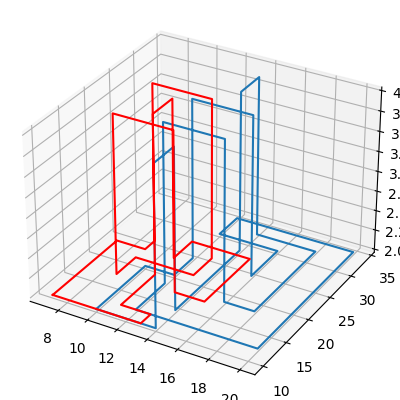

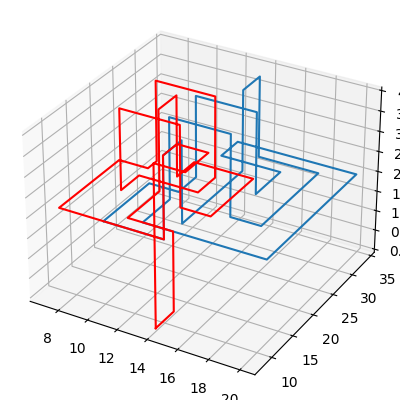

In [11]:
k1 = CustomKnot([X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)])
k2 = CustomKnot([X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)])

algorithm = ThreeDimensionalAlgorithm(k1,k2)
# algorithm.plot()
for t in transforms:
    algorithm.node.applyTransform(t)

algorithm.plot()
i=0
while i <10:
    print("---------")
    # print(algorithm.node.transforms)
    algorithm.completeTarget(i,debug=1)
    #print(algorithm.node.transforms)
    algorithm.printTargetCompletes()
    # algorithm.plot()
    i+=1
transforms = algorithm.node.transforms
print(algorithm.node.transforms)
print(algorithm.node.transforms[-1])
algorithm.plot()
# plt.pause(0.00005)
# algorithm.completeTarget(i,debug= 2)
# algorithm.printTargetCompletes()
# algorithm.plot()

In [27]:
image = k.image()

fig, ax = plt.subplots()#figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')

NameError: name 'k' is not defined